# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

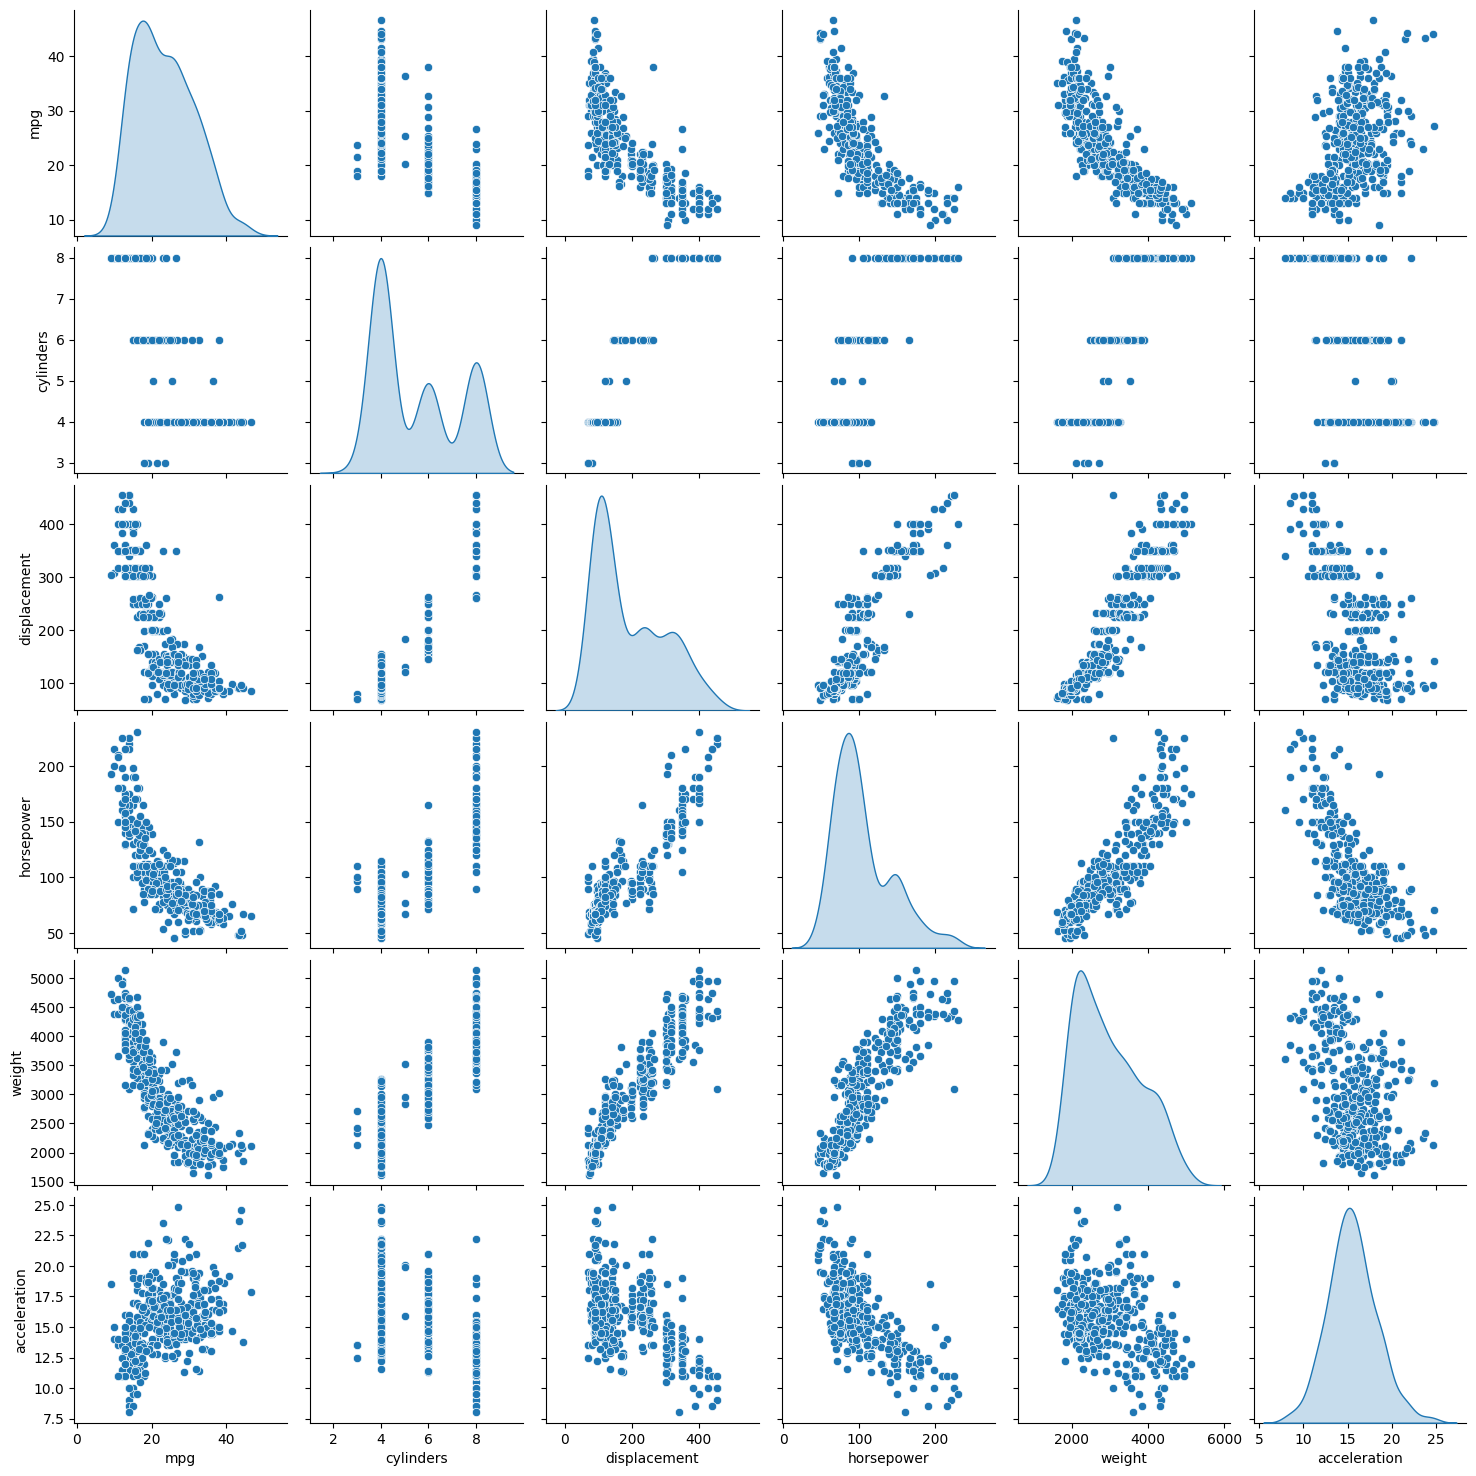

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [4]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [5]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

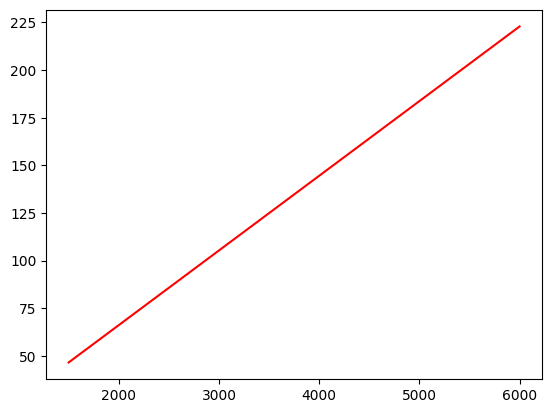

In [6]:
X_plot= np.array([[1500],[6000]])
X_plot_b = np.c_[np.ones((2,1)),X_plot]
Y_plot = X_plot_b.dot(beta_values)

Equationline = "Y = {:.3f}+{:.3f}X".format(beta_values[0], beta_values[1])

plt.plot(X_plot, Y_plot, "r-", label = Equationline)
sns.scatterplot(X,Y, label = "Training Data")
plt.legend()
plt.show()

Next, we show how to find the model with scikit-learn.

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [8]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

Y = 0.0012 X^2 -0.466 X + 56.900


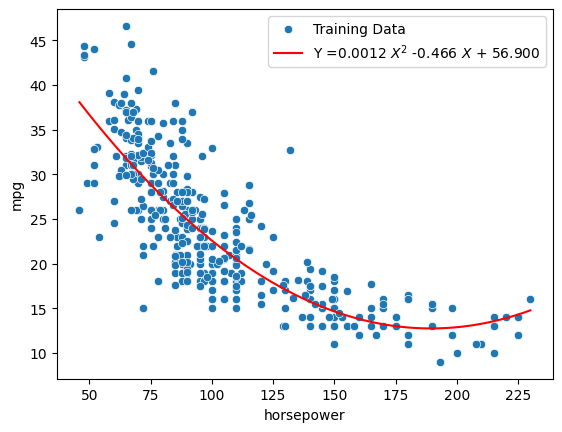

In [11]:
# Install necessary libraries
!pip install numpy pandas seaborn matplotlib scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

# Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

# Converting the series to a column matrix
X_new = X.values.reshape(-1, 1)
y_new = y.values.reshape(-1, 1)

# Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(
    reg.coef_[0, 1], reg.coef_[0, 0], reg.intercept_[0]))

start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0, 1] * X_plot * X_plot + reg.coef_[0, 0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(
    reg.coef_[0, 1], reg.coef_[0, 0], reg.intercept_[0])

# Use the correct way to call scatterplot
# Pass the column names as keyword arguments to sns.scatterplot()
# The data parameter is required to use the column names in x and y
sns.scatterplot(x="horsepower", y="mpg", data=df, label="Training Data")
plt.plot(X_plot, Y_plot, "r-", label=Equationline)
plt.legend()
plt.show()

In [10]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

sns.scatterplot(X,y, label = "Training Data")
plt.plot(X_plot, Y_plot, "r-", label = Equationline)
plt.legend()
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

### Least-squares surfaces with `NumPy` and `SciPy`

In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

AttributeError: 'DataFrame' object has no attribute 'horsepower'

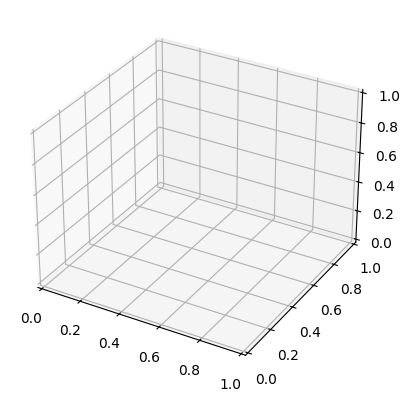

In [33]:
# Plotting the surface plot
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

Y_reg = reg.intercept_ + (reg.coef_[0] * X1_values) + (reg.coef_[1] * X2_values)
Y_plot = Y_reg.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.horsepower, X.weight, Y, color="red", s=1)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10)

ax.view_init(50 ,150)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
plt.legend()
plt.show()

Assume the 3D plot is calculated as above ,Please predict the following displacement based on the glown horsepower and weight

1) horsepower = 87 and weight is 2500,what is the displacement value

2)horsepower = 175 and weight = 4800, what is the displacement

---



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


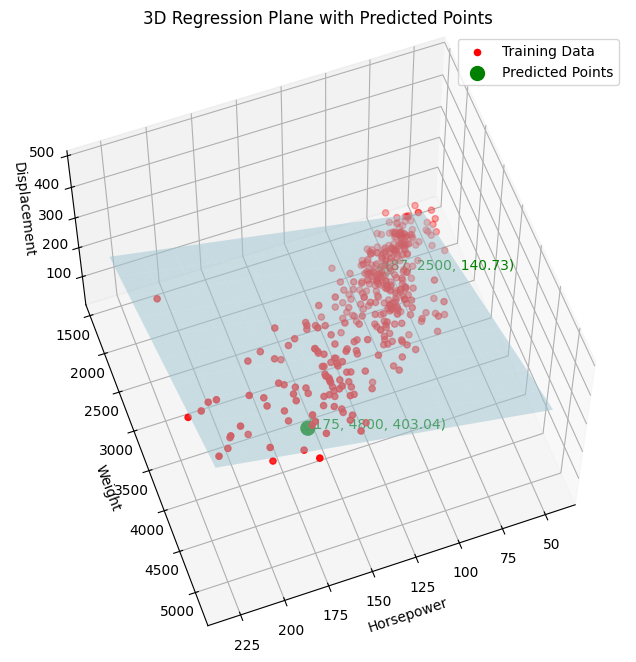

In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower", "weight"]]

# Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Prediction function
def predict_displacement(horsepower, weight):
    """Predicts displacement based on given horsepower and weight."""
    new_data = np.array([[horsepower, weight]])
    prediction = reg.predict(new_data)
    return prediction[0]

# Predictions for the given scenarios
horsepower1 = 87
weight1 = 2500
displacement1 = predict_displacement(horsepower1, weight1)

horsepower2 = 175
weight2 = 4800
displacement2 = predict_displacement(horsepower2, weight2)

# --- 3D Plotting ---

# Prepare data for the regression plane
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
Y_plot = reg.intercept_ + reg.coef_[0] * X1_plot + reg.coef_[1] * X2_plot

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the regression plane
ax.plot_surface(
    X1_plot, X2_plot, Y_plot, alpha=0.5, rstride=10, cstride=10, color='lightblue'
)

# Plot the original data points
ax.scatter(
    df["horsepower"], df["weight"], df["displacement"], color="red", label="Training Data"
)

# Plot the predicted points
ax.scatter(
    [horsepower1, horsepower2],
    [weight1, weight2],
    [displacement1, displacement2],
    color="green",
    marker="o",
    s=100,
    label="Predicted Points",
)

# Add text labels for the predicted points
ax.text(horsepower1, weight1, displacement1, f'({horsepower1}, {weight1}, {displacement1:.2f})', color='green')
ax.text(horsepower2, weight2, displacement2, f'({horsepower2}, {weight2}, {displacement2:.2f})', color='green')

# Set labels and title
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_zlabel("Displacement")
ax.set_title("3D Regression Plane with Predicted Points")
ax.legend()
ax.view_init(60, 70)
plt.show()

Q2 please predict the horse power based on the value of weight, acceleration and mpg.
Thereare 3 X values and 1 Y value. Please train the model

Intercept (beta_0): 115.7320541366234
Coefficients (beta_1, beta_2, beta_3): [ 0.02824518 -5.42993202 -0.46817225]
For weight = 3000, acceleration = 15, and mpg = 25, the predicted horsepower is: 107.31
For weight = 2500, acceleration = 12, and mpg = 30, the predicted horsepower is: 107.14


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


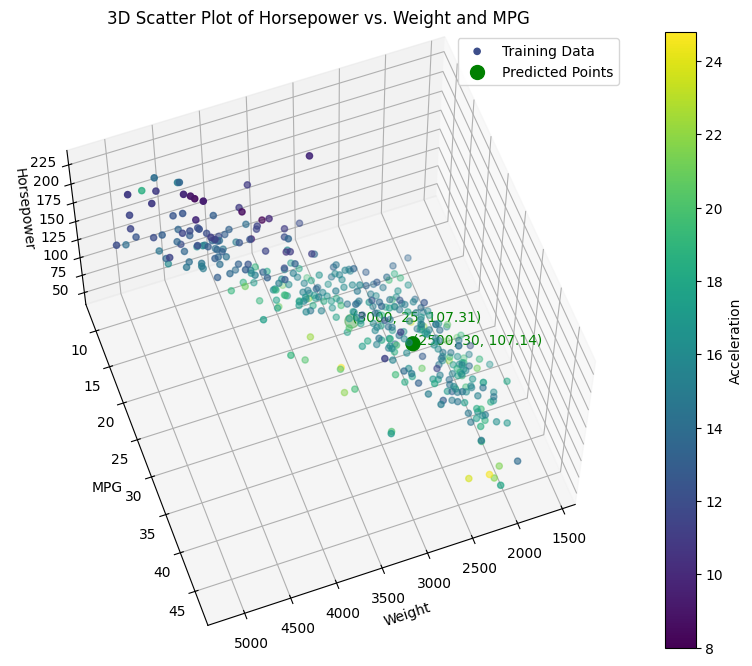

In [31]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("auto_dataset.csv")

# Define X (features) and Y (target)
X = df[["weight", "acceleration", "mpg"]]
Y = df["horsepower"]

# Create and train the model
reg = LinearRegression()
reg.fit(X, Y)

# Print the coefficients and intercept
print("Intercept (beta_0):", reg.intercept_)
print("Coefficients (beta_1, beta_2, beta_3):", reg.coef_)

# Prediction function
def predict_horsepower(weight, acceleration, mpg):
    """Predicts horsepower based on weight, acceleration, and mpg."""
    new_data = np.array([[weight, acceleration, mpg]])
    prediction = reg.predict(new_data)
    return prediction[0]

# Example predictions
weight_example = 3000
acceleration_example = 15
mpg_example = 25
predicted_horsepower = predict_horsepower(
    weight_example, acceleration_example, mpg_example
)
print(
    f"For weight = {weight_example}, acceleration = {acceleration_example}, and mpg = {mpg_example}, the predicted horsepower is: {predicted_horsepower:.2f}"
)

weight_example2 = 2500
acceleration_example2 = 12
mpg_example2 = 30
predicted_horsepower2 = predict_horsepower(
    weight_example2, acceleration_example2, mpg_example2
)
print(
    f"For weight = {weight_example2}, acceleration = {acceleration_example2}, and mpg = {mpg_example2}, the predicted horsepower is: {predicted_horsepower2:.2f}"
)


# --- 3D Plotting (Simplified for Visualization) ---

# Choose two features to visualize (e.g., weight and mpg)
X_plot = df[["weight", "mpg"]]
X_plot_values = X_plot.values
Y_plot = df["horsepower"]

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the original data points
scatter = ax.scatter(
    X_plot["weight"], X_plot["mpg"], Y_plot, c=df["acceleration"], cmap="viridis", label="Training Data"
)

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label("Acceleration")

# Plot the predicted points
ax.scatter(
    [weight_example, weight_example2],
    [mpg_example, mpg_example2],
    [predicted_horsepower, predicted_horsepower2],
    color="green",
    marker="o",
    s=100,
    label="Predicted Points",
)
# Add text labels for the predicted points
ax.text(weight_example, mpg_example, predicted_horsepower, f'({weight_example}, {mpg_example}, {predicted_horsepower:.2f})', color='green')
ax.text(weight_example2, mpg_example2, predicted_horsepower2, f'({weight_example2}, {mpg_example2}, {predicted_horsepower2:.2f})', color='green')

# Set labels and title
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
ax.set_zlabel("Horsepower")
ax.set_title("3D Scatter Plot of Horsepower vs. Weight and MPG")
ax.legend()
ax.view_init(60, 70)
plt.show()

In [34]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load your dataset
df = pd.read_csv("auto_dataset.csv")  # Replace with the actual path to your dataset

# Select the independent variables and dependent variable
X = df[["weight", "acceleration", "mpg"]]
Y = df["horsepower"]

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Create a meshgrid for weight and acceleration (fixed mpg value of 25)
weight_range = np.linspace(X["weight"].min(), X["weight"].max(), 30)
acc_range = np.linspace(X["acceleration"].min(), X["acceleration"].max(), 30)
weight_grid, acc_grid = np.meshgrid(weight_range, acc_range)

# Assume mpg = 25 (fixed value for simplicity)
mpg_value = 25  # You can change this value to explore different scenarios

# Predict horsepower values using the regression model
horsepower_grid = reg.intercept_ + reg.coef_[0] * weight_grid + reg.coef_[1] * acc_grid + reg.coef_[2] * mpg_value

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(
    z=horsepower_grid, x=weight_grid, y=acc_grid,
    colorscale='Viridis', opacity=0.8)])

# Add the actual data points to the plot (as red markers)
fig.add_trace(go.Scatter3d(
    x=X["weight"], y=X["acceleration"], z=Y,
    mode='markers', marker=dict(size=5, color='red')))

# Update plot layout for titles and axes labels
fig.update_layout(
    title="Interactive 3D Linear Regression Model",
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Acceleration',
        zaxis_title='Horsepower'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()